# Decision Tree Classification on Heart Disease Dataset

## Objective


The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyze the performance of the model, and interpret the results.


## 1. Data Preparation

### Loading Dataset

In [85]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')


# Load the dataset
df = pd.read_excel(r"E:\Data Science Course\Completed Data Science Assignments\Decision Tree\Decision Tree\heart_disease.xlsx", sheet_name='Heart_disease')

# Display the first few rows of the dataset
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


### Data Description

This dataset contains medical records of patients with suspected coronary artery disease. It includes various clinical and diagnostic features that can be used to assess the presence and severity of the disease.

#### Columns
- **age**: Age of the patient in years.
- **sex**: Gender of the patient (Male/Female).
- **cp**: Type of chest pain experienced (typical angina, atypical angina, asymptomatic, non-anginal pain).
- **trestbps**: Resting blood pressure (in mm Hg on admission to the hospital).
- **chol**: Serum cholesterol in mg/dl.
- **fbs**: Fasting blood sugar > 120 mg/dl (True/False).
- **restecg**: Resting electrocardiographic results (normal, having ST-T wave abnormality, showing probable or definite left ventricular hypertrophy by Estes' criteria).
- **thalach**: Maximum heart rate achieved.
- **exang**: Exercise induced angina (True/False).
- **oldpeak**: ST depression induced by exercise relative to rest.
- **slope**: The slope of the peak exercise ST segment (upsloping, flat, downsloping).
- **thal**: Thallium stress test result (normal, fixed defect, reversible defect).
- **num**: Diagnosis of heart disease (0 = no disease, 1 = disease present).

### Checking for Inconsistency

In [86]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

- `exang` column contains `True` and `False` value but it shown as `object` Type instead of `bool`, so we have to solve this inconsistency in this column

#### Checking unique values in `exang` column

In [87]:
df.exang.unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

#### Replacing Values

In [88]:
df['exang'].replace('TURE',True, inplace= True)
df['exang'].replace('FALSE',False, inplace= True)

#### Varifying after replacing

In [89]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang          bool
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

### Checking Missing Values
Check for missing values and handle them if necessary.


In [90]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

### Handling Missing Value in `oldpeak` Column

To handle missing value in oldpeak column first we have to check data distribution in this column

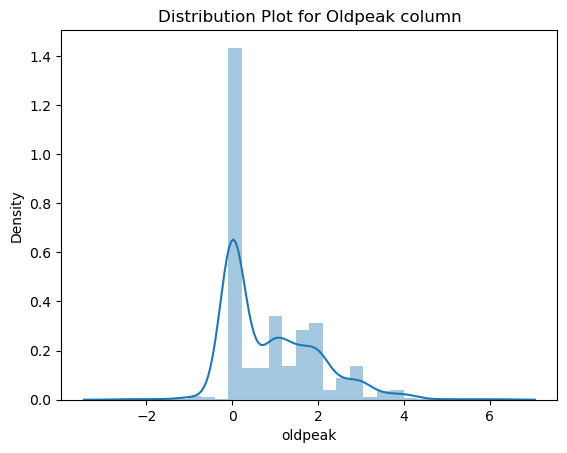

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

sns.distplot(df.oldpeak,kde= 'hist')
plt.title('Distribution Plot for Oldpeak column')
plt.show()

- Data is skewed in this column, so i use mode to replace the missing values instead of mean

In [92]:
df.oldpeak.mode()

0    0.0
Name: oldpeak, dtype: float64

- Imputing with `mode`

In [93]:
df['oldpeak'].fillna(df['oldpeak'].mode().iloc[0], inplace=True)

#### Varifying data after imputation

In [94]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

## 2. Exploratory Data Analysis (EDA):

### Outliers Detection

In [95]:
import numpy as np

for i, column in enumerate(df.select_dtypes(include='number').columns):
    lower_quartile = np.quantile(df[column], 0.25)
    upper_quartile = np.quantile(df[column], 0.75)
    iqr = upper_quartile - lower_quartile

    upper_bound = upper_quartile + (iqr * 1.5)
    lower_bound = lower_quartile - (iqr * 1.5)

    outliers = ((df[column] > upper_bound) | (df[column] < lower_bound)).sum()
    percentage = (outliers / len(df[column])) * 100

    print(f'{column}: {percentage:.3f}%')

age: 0.110%
trestbps: 2.423%
chol: 20.595%
thalch: 0.110%
oldpeak: 1.762%
num: 0.000%


- We retaining with outliers in `chol` column because its due to some extream cholesterol levels

### Descriptive Analysis

In [96]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.830396,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.079518,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.200000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


### Visualizing Data

#### Ploting Box plot fro numerical columns

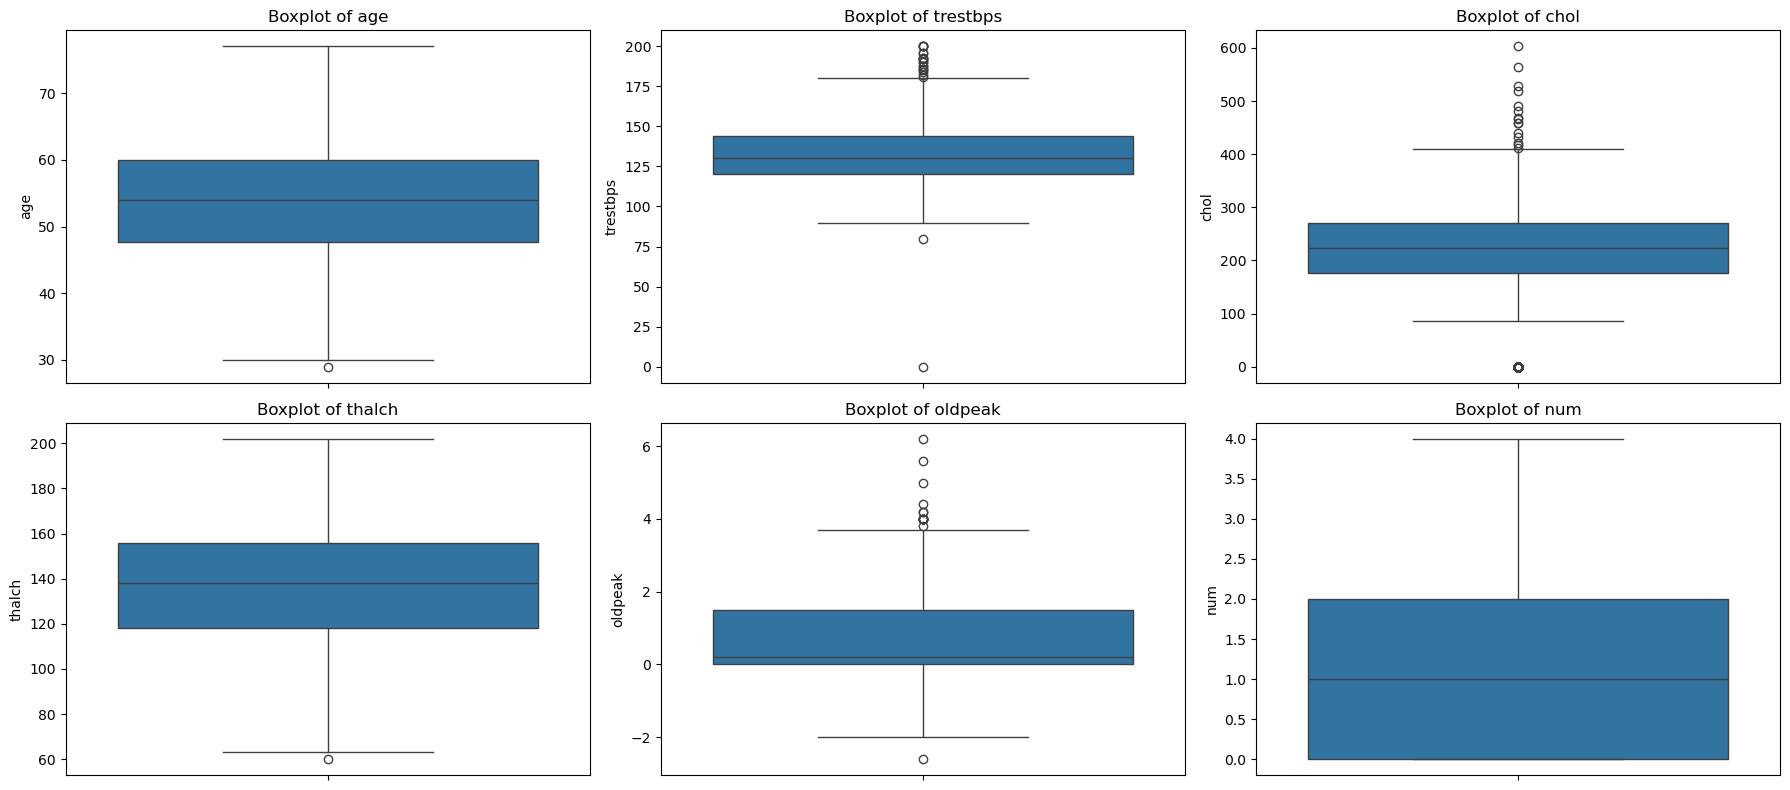

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
i = 0
j = 0
for col in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df[col], ax=axes[i,j])
    axes[i,j].set_title(f'Boxplot of {col}')
    j = j+1
    if j==3:
        i= i+1
        j= 0
plt.tight_layout()
plt.show()


#### Insights:

- **Age:** The distribution of ages is fairly normal, with a slightly wider spread towards the older ages.
- **trestbps:** The distribution of resting blood pressure is slightly skewed to the right, with a few outliers on the higher end.
- **chol:** The distribution of cholesterol is also slightly skewed to the right, with a few outliers on the higher end.
- **thalch:** The distribution of maximum heart rate achieved is fairly normal, with a slight skew towards the lower end.
- **oldpeak :** The distribution of ST depression induced by exercise relative to rest is skewed to the right, with a few outliers on the higher end.
- **num:** The distribution of the num column is concentrated around 1, with a few outliers on the higher end.

#### Ploting Histogram to check distribution of each column

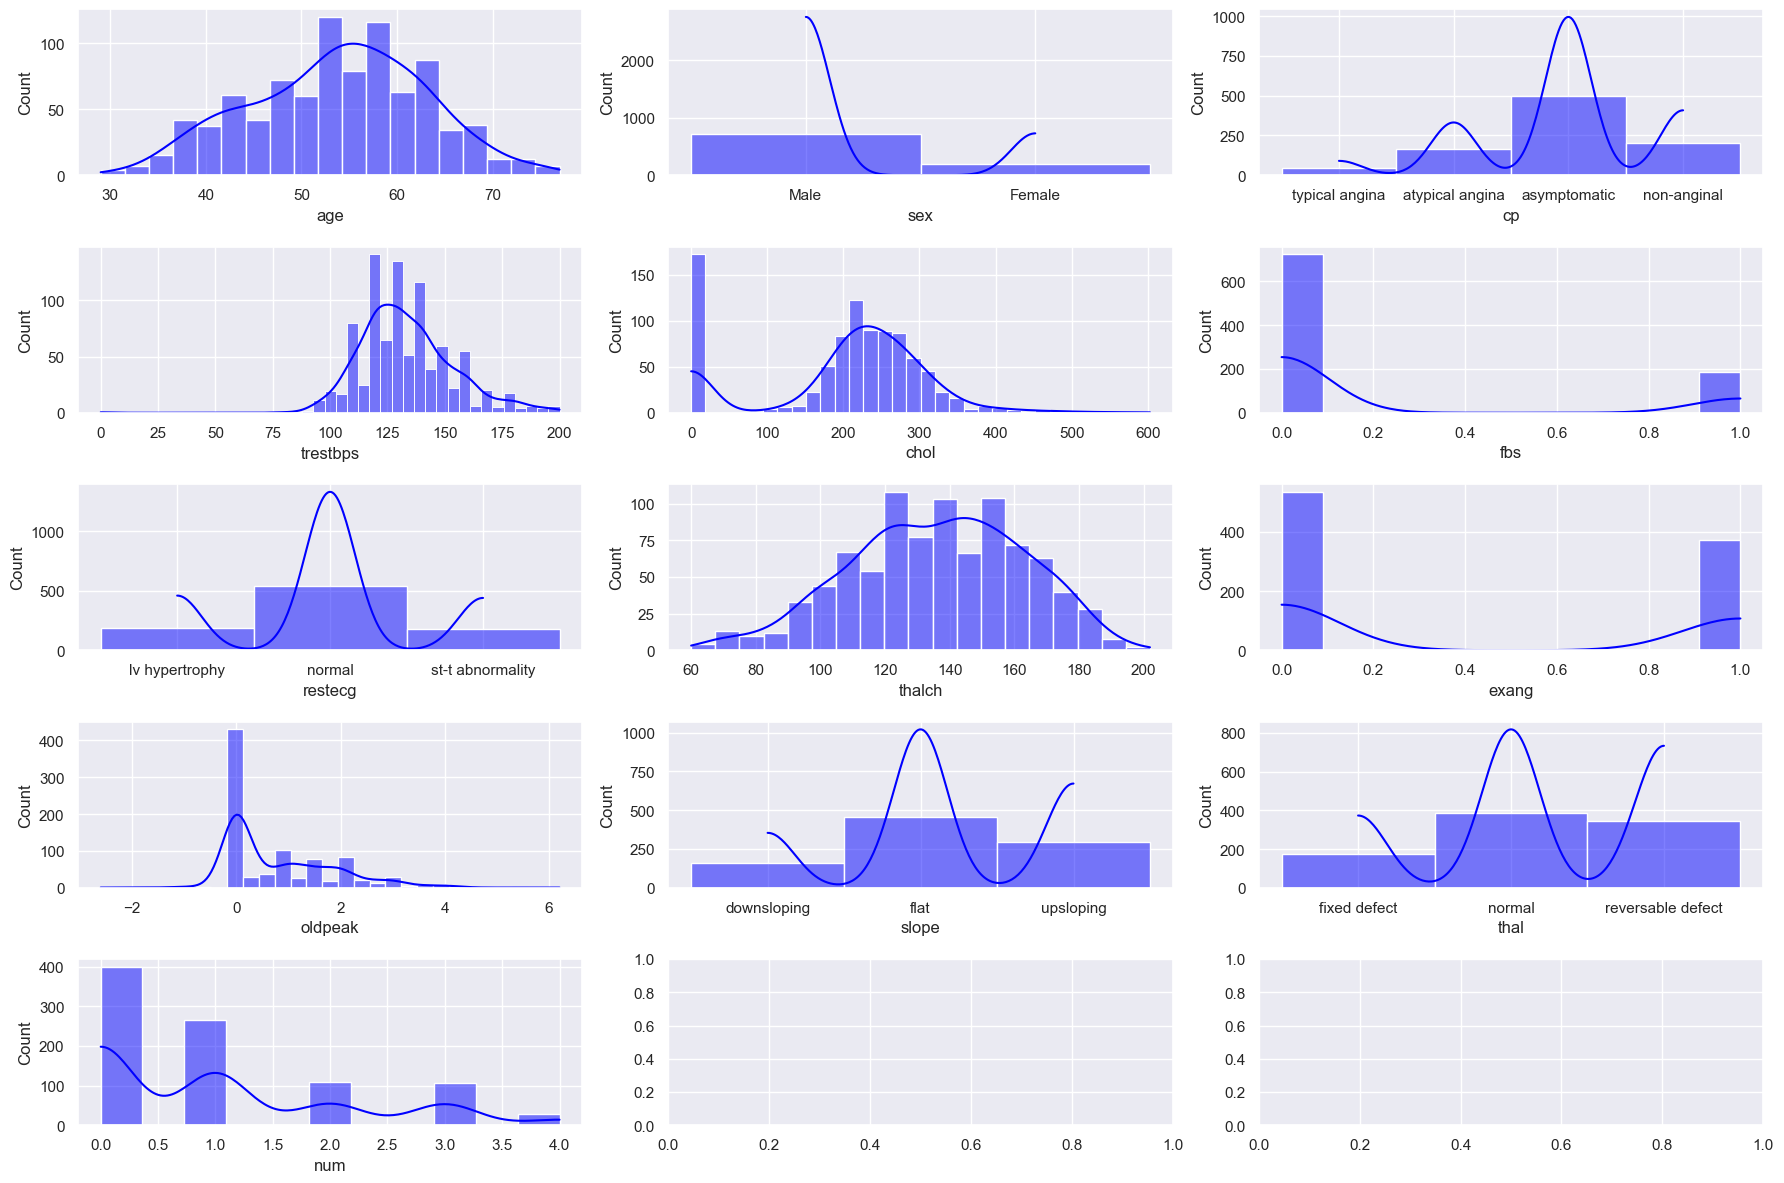

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize= (18,12))
i = 0
j = 0
for col in df.columns:
    sns.set(style= 'darkgrid')
    sns.histplot(df[col], kde= 'hist',ax= axes[i,j],color='blue')
    j +=1
    if j==3:
        j= 0
        i +=1
plt.tight_layout()
plt.show()

Here are the key insights from the histogram:

1. **Age**: Most patients are between 40 and 65.
2. **Sex**: The dataset is male-dominated.
3. **Chest Pain (cp)**: Asymptomatic and typical angina are the most common.
4. **Blood Pressure (trestbps)**: Most values range from 100 to 150 mmHg.
5. **Cholesterol (chol)**: Cholesterol is skewed towards higher values, mostly between 150-300 mg/dL.
6. **Fasting Blood Sugar (fbs)**: Few patients have elevated fasting blood sugar.
7. **Rest ECG (restecg)**: Normal results dominate.
8. **Max Heart Rate (thalch)**: Peaks around 120-160 bpm.
9. **Exercise Angina (exang)**: Most patients do not experience it.
10. **Oldpeak**: Many have no ST depression; skewed right.
11. **Slope**: Flat and downsloping are most common.
12. **Thalassemia (thal)**: Normal, fixed, and reversible defects are present.
13. **Major Vessels (num)**: Most patients have 0-1 major vessels involved.


#### Ploting Correlation matrix 

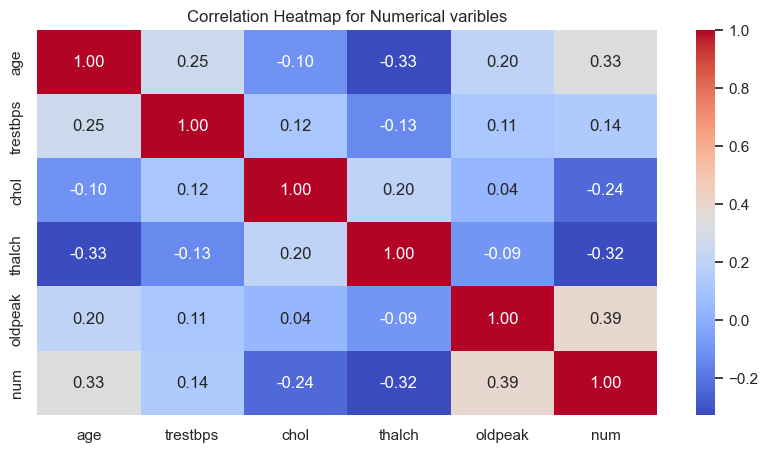

In [160]:
# Correlation heatmap to understand relationships between features
plt.figure(figsize=(10, 5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numerical varibles')
plt.show()

This correlation heatmap provides insights into the relationships between different numerical variables in the dataset. Here are a few key observations:

1. **Age and Num (Target)**:
   - There is a moderate positive correlation (0.33) between age and the target variable (num). This suggests that age might be a factor related to the condition or outcome being studied.

2. **Trestbps (Resting Blood Pressure) and Other Variables**:
   - Trestbps shows weak correlations with all other variables. The highest correlation is with age (0.25), indicating that age might influence blood pressure.

3. **Cholesterol (Chol) and Other Variables**:
   - Chol has relatively low correlations with other variables. The highest is with thalach (maximum heart rate), showing a weak positive correlation (0.20).

4. **Thalach (Maximum Heart Rate) and Num**:
   - Thalach has a negative correlation (-0.32) with the target variable num, indicating that a higher heart rate may be inversely associated with the condition.

5. **Oldpeak (ST Depression) and Num**:
   - Oldpeak shows a moderately positive correlation (0.39) with the target variable num. This suggests that as the oldpeak increases, the likelihood of the condition may increase.

6. **Overall**:
   - Most correlations are weak to moderate, with no values indicating strong linear relationships. This suggests that while some variables may be related to the target, the relationships are not very strong, which may indicate the need for more complex modeling approaches to predict the target.

## 3. Feature Engineering:


### Encoding Categorical Variables
Encode categorical variables using Label Encoding.


In [161]:
# Encode categorical variables
categorical_columns = ['sex', 'cp', 'restecg', 'slope', 'thal', 'exang', 'fbs']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Display the first few rows of the preprocessed dataset
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0



### Scaling Numerical Features
Scale numerical features using StandardScaler.


In [162]:

# Scale numerical features
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the first few rows of the preprocessed dataset
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006027,1,3,0.567394,0.281297,1,0,0.524183,0,1.362102,0,0,0
1,-1.397560,1,1,0.076967,0.013526,0,1,-0.147705,0,-0.769653,1,0,0
2,0.350503,1,0,0.322181,-0.084656,0,1,0.449529,0,-0.398913,1,0,0
3,-0.195767,1,3,-0.756760,-0.138211,0,0,2.017268,0,-0.769653,1,0,0
4,0.350503,1,0,-1.149102,-0.004325,0,1,-0.371668,1,0.620622,1,0,0


## 4. Decision Tree Classification:

### Split the Dataset

In [163]:

from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['num'])
y = df['num']

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((726, 12), (182, 12), (726,), (182,))

### Implement and train a Decision Tree Classifier

In [180]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


# Display the model's performance metrics
print(f"Accuracy: {round(accuracy,3)}")
print(f"Precision: {round(precision,3)}")
print(f"Recall: {round(recall,3)}")
print(f"F1-Score: {round(f1,3)}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.516
Precision: 0.509
Recall: 0.516
F1-Score: 0.512
Confusion Matrix:
[[66 14  5  4  0]
 [16 17  9  6  0]
 [ 3  5 10  3  1]
 [ 3 10  1  1  2]
 [ 0  3  2  1  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75        89
           1       0.35      0.35      0.35        48
           2       0.37      0.45      0.41        22
           3       0.07      0.06      0.06        17
           4       0.00      0.00      0.00         6

    accuracy                           0.52       182
   macro avg       0.31      0.32      0.31       182
weighted avg       0.51      0.52      0.51       182



#### Insights
- The accuracy of the model is approximately 51.6%.
- The precision, recall, and F1-score are also around 51-52%.
- The confusion matrix and classification report provide more detailed insights into the model's performance.

## 5. Hyperparameter Tuning:

In [207]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 10, None],  # Maximum depth of the tree
    'min_samples_split': [2, 10, 20],  # Minimum number of samples required to split a node
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split 
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model using the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict on the test set with the best model
y_pred = best_estimator.predict(X_test)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


## 6. Model Evaluation and Analysis


### Model Performance Metrics
- **Accuracy**: The proportion of correctly classified instances.
- **Precision**: The proportion of positive identifications that were actually correct.
- **Recall**: The proportion of actual positives that were identified correctly.
- **F1-Score**: The harmonic mean of precision and recall.


In [215]:
# Evaluate the tuned model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print('Tuned Accuracy =', round(accuracy, 3))
print('Tuned Precision =', round(precision, 3))
print('Tuned Recall =', round(recall, 3))
print('Tuned F1 Score =', round(f1, 3))
print('\nConfusion Matrix')
print(conf_matrix)
print('\nClassification Report')
print(class_report)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 20}
Tuned Accuracy = 0.555
Tuned Precision = 0.52
Tuned Recall = 0.555
Tuned F1 Score = 0.529

Confusion Matrix
[[69 13  6  1  0]
 [18 26  4  0  0]
 [ 2 13  5  2  0]
 [ 5  6  5  1  0]
 [ 0  5  1  0  0]]

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.78      0.75        89
           1       0.41      0.54      0.47        48
           2       0.24      0.23      0.23        22
           3       0.25      0.06      0.10        17
           4       0.00      0.00      0.00         6

    accuracy                           0.55       182
   macro avg       0.33      0.32      0.31       182
weighted avg       0.52      0.55      0.53       182



#### Insights from the Hyperparameter Tuning:

1. **Best Hyperparameters**:
   - **Criterion**: `'gini'` - The Gini impurity was chosen as the best split criterion. It tends to perform well in most classification tasks by minimizing the probability of misclassification.
   - **Max Depth**: `5` - Limiting the tree depth to 5 prevents overfitting by reducing the model's complexity. This helps generalize better to unseen data.
   - **Min Samples Split**: `20` - This ensures that a node needs at least 20 samples before it can split. A higher value leads to fewer splits and, therefore, a simpler tree.

2. **Performance Metrics** (Before vs. After Tuning):
   - **Accuracy**: Increased from `0.516` to `0.555` – A noticeable improvement. More predictions are correct, indicating that the model is better identifying the correct classes.
   - **Precision**: Improved from `0.509` to `0.52` – A small gain, suggesting that the model is slightly better at reducing false positives.
   - **Recall**: Improved from `0.516` to `0.555` – This shows that the model is now identifying more true positives, which is crucial when false negatives have a higher cost.
   - **F1 Score**: Increased from `0.512` to `0.529` – Since F1 balances both precision and recall, the improvement in F1 indicates that both these metrics are moving in the right direction, making the model more reliable overall.

3. **Impact of Hyperparameter Tuning**:
   - **Controlled Overfitting**: Setting a limit on `max_depth` (5) and requiring a minimum of 20 samples to split helps prevent overfitting. Previously, the tree might have grown too deep, capturing noise in the training data. The tuning has helped the model generalize better on the test data.
   - **Trade-off**: The improvement in accuracy and recall is slightly more significant than precision, meaning the model is finding more positives but might still make some incorrect predictions. The slight drop in precision after tuning may indicate that some of the new positives identified are false positives.

### Visualize the Decision Tree
Visualize the decision tree structure to understand the rules learned by the model and identify important features.


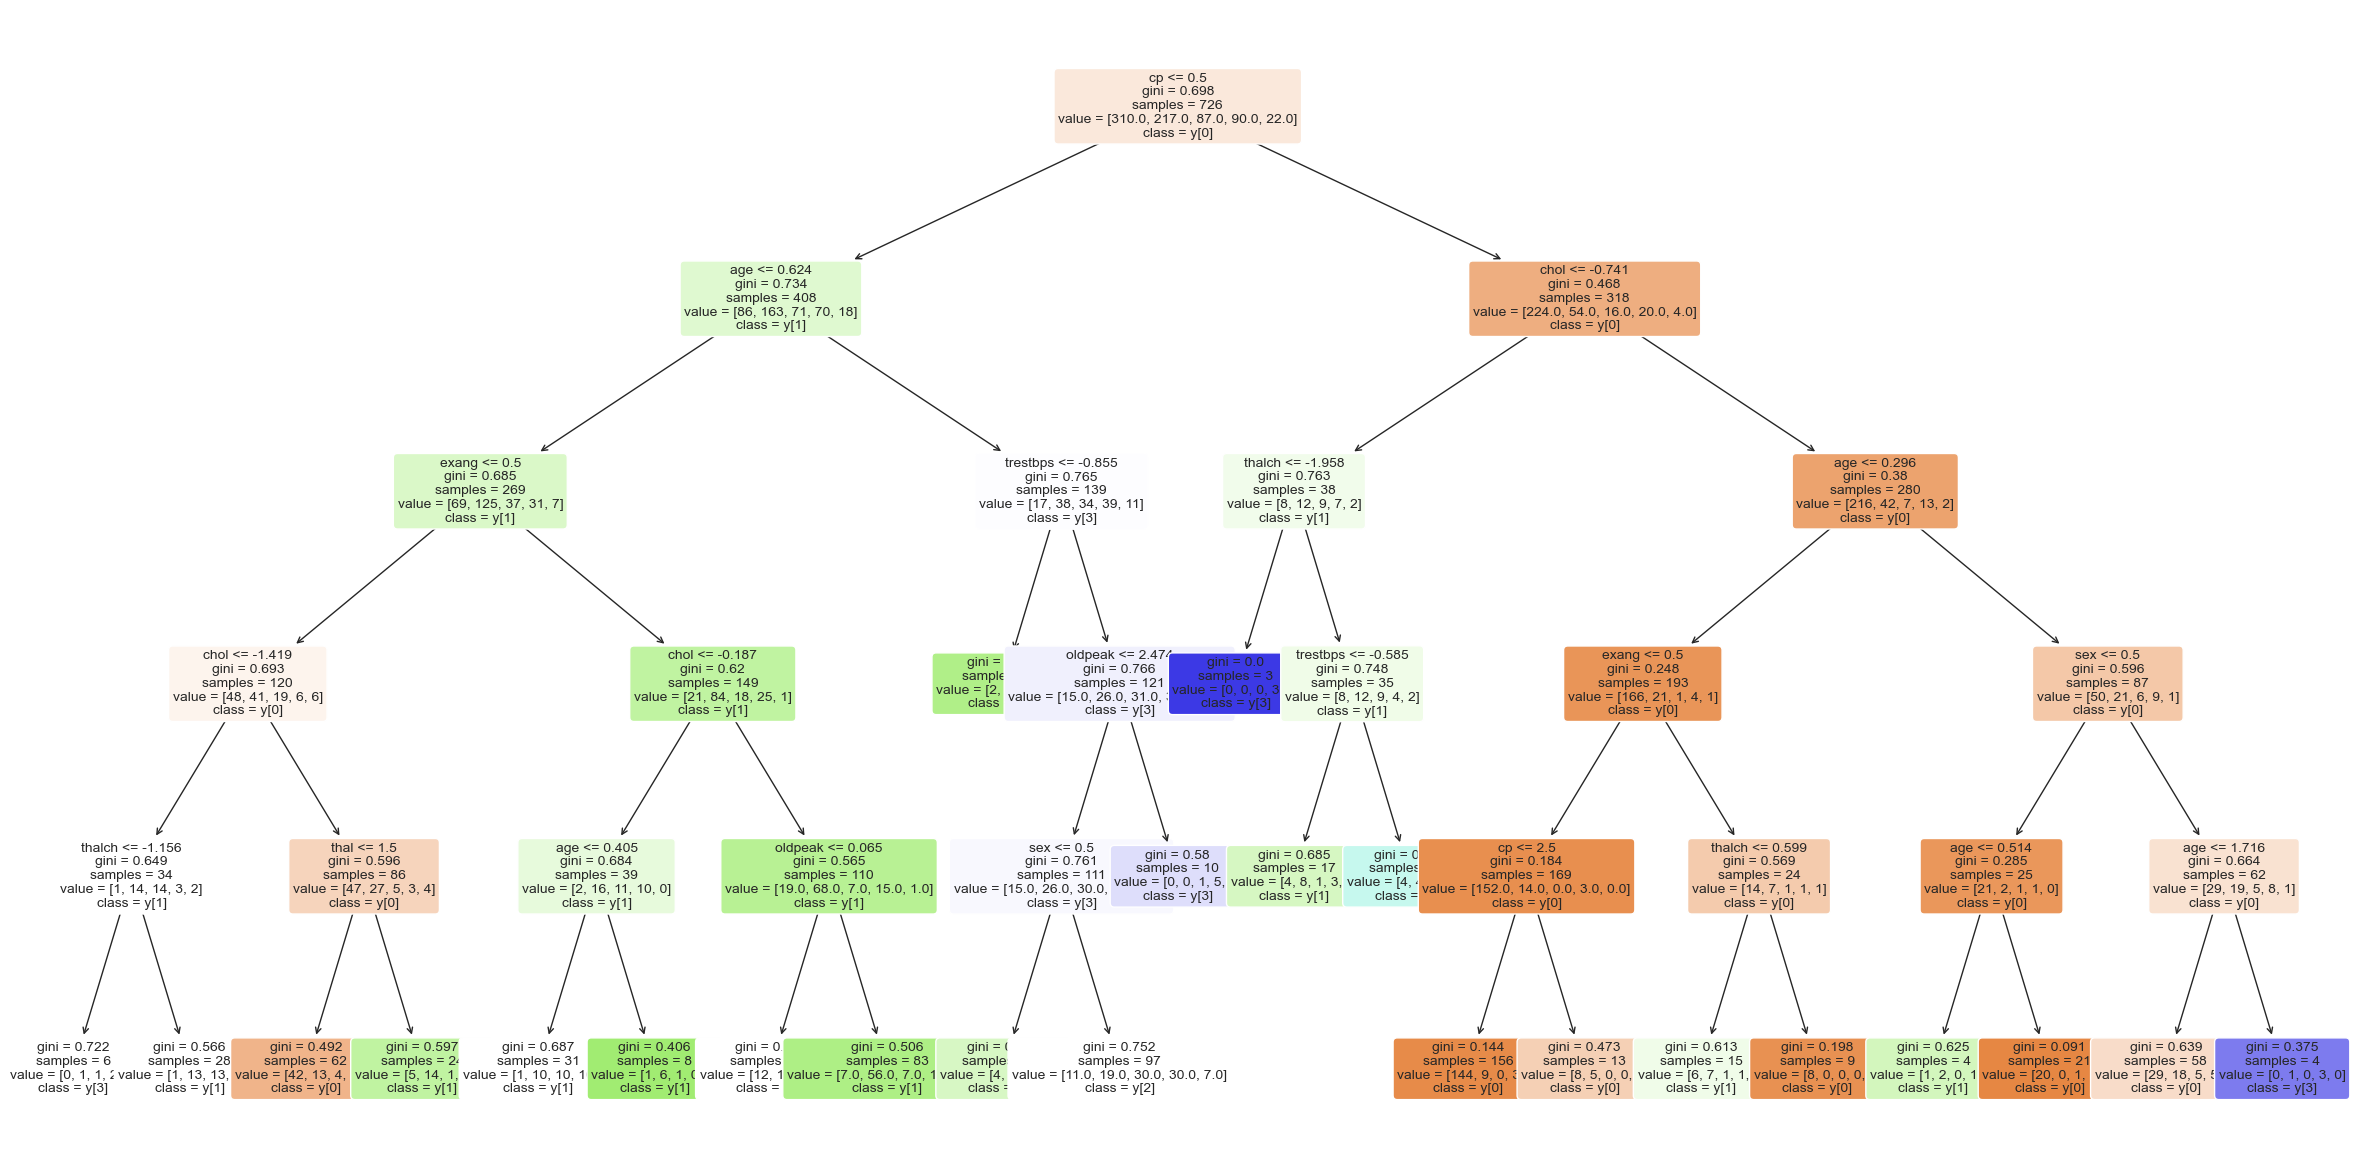

In [221]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(30, 15))  # Adjust the figure size for better readability
plot_tree(best_estimator, 
          feature_names=X_train.columns,  # Use the column names if available
          class_names=True,  # Display class labels
          filled=True,  # Color the nodes
          rounded=True,  # Rounded corners for the nodes
          fontsize=10)  # Adjust the font size
plt.show()

## Interview questions:

### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

**a. Max Depth:**
- **Description:** The maximum depth of the tree. It limits the number of splits in the tree.
- **Effect on Performance:** Restricting the depth of the tree can help prevent overfitting by ensuring the model does not become too complex. A very shallow tree may underfit the data, while a very deep tree may overfit.

**b. Min Samples Split:**
- **Description:** The minimum number of samples required to split an internal node.
- **Effect on Performance:** Increasing this value can prevent the model from learning overly specific patterns that may not generalize well. Smaller values can lead to a more complex tree.

**c. Min Samples Leaf:**
- **Description:** The minimum number of samples required to be at a leaf node.
- **Effect on Performance:** This parameter helps in smoothing the model by setting a minimum number of samples for the leaf nodes, which can help prevent overfitting.

**d. Max Features:**
- **Description:** The number of features to consider when looking for the best split.
- **Effect on Performance:** Reducing the number of features to consider for each split can make the model more robust and prevent overfitting. However, setting it too low might lead to underfitting.

**e. Max Leaf Nodes:**
- **Description:** The maximum number of leaf nodes in the tree.
- **Effect on Performance:** Limiting the number of leaf nodes can help control the complexity of the tree and thus reduce overfitting.

**f. Criterion:**
- **Description:** The function used to measure the quality of a split (e.g., Gini impurity or entropy for classification, mean squared error for regression).
- **Effect on Performance:** Different criteria can affect the way splits are made, influencing the model's ability to fit the data.

### 2. Difference Between Label Encoding and One-Hot Encoding

**Label Encoding:**
- **Description:** Converts categorical values into numerical values. Each unique category value is assigned an integer.
- **Example:** If a column has three categories ["Red", "Green", "Blue"], they might be encoded as [0, 1, 2].
- **Use Case:** Useful for ordinal categorical variables where the order matters. However, it can introduce a sense of hierarchy or ordinal relationship that might not exist.

**One-Hot Encoding:**
- **Description:** Converts categorical values into a binary matrix where each column represents one of the categories. Each category is represented as a binary vector with a single '1' and '0's elsewhere.
- **Example:** For the same categories ["Red", "Green", "Blue"], one-hot encoding would create three columns, one for each category. If the value is "Green", the encoded vector would be [0, 1, 0].
- **Use Case:** Best for nominal categorical variables where no ordinal relationship exists. It avoids introducing a false ordinal relationship and is often used in machine learning models.

####  **Author Information:**
- **Author:-**  Er.Pradeep Kumar
- **LinkedIn:-**  [https://www.linkedin.com/in/pradeep-kumar-1722b6123/](https://www.linkedin.com/in/pradeep-kumar-1722b6123/)

#### **Disclaimer:**
This Jupyter Notebook and its contents are shared for educational purposes. The author, Pradeep Kumar, retains ownership and rights to the original content. Any modifications or adaptations should be made with proper attribution and permission from the author.